In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'students-performance-in-exams' dataset.
Path to dataset files: /kaggle/input/students-performance-in-exams


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [6]:
df = pd.read_csv(f"{path}/StudentsPerformance.csv")
display(df.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Dataset Information

In [8]:
print(f"Dataset Shape: {df.shape}")
print("Column Names:")
for col in df.columns:
    print(f"- {col}")
print("\nData Types:")
print(df.info())

Dataset Shape: (1000, 8)
Column Names:
- gender
- race/ethnicity
- parental level of education
- lunch
- test preparation course
- math score
- reading score
- writing score

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


Independent Variable(s) (X)

 * gender
 * race/ethnicity
 * parental level of education
 * lunch
test preparation course

Dependent Variable(s) (y)

* math score
* reading score
* writing score

In [9]:
#  Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

#  Handle missing values
# from df.info() we know there are no missing values .

Missing values before handling:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [10]:
from sklearn.model_selection import train_test_split
import numpy as np

# define target variable (y) and feature variables (X)

y = df['math score']
X = df.drop(columns=['math score', 'reading score', 'writing score'])

# Convert categorical features into numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

print("Shape of X after one-hot encoding:", X.shape)
print("First 5 rows of X (features):")
display(X.head())
print("First 5 rows of y (target - math score):")
display(y.head())

Shape of X after one-hot encoding: (1000, 12)
First 5 rows of X (features):


,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,False,True,False,False,False,True,False,False,False,False,True,True
1,False,False,True,False,False,False,False,False,True,False,True,False
2,False,True,False,False,False,False,False,True,False,False,True,True
3,True,False,False,False,False,False,False,False,False,False,False,True
4,True,False,True,False,False,False,False,False,True,False,True,True


First 5 rows of y (target - math score):


,math score
0,72
1,69
2,90
3,47
4,76


In [11]:
#  Split the data into training and testing sets 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 12)
X_test shape: (200, 12)
y_train shape: (800,)
y_test shape: (200,)


In [12]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model using the training data
linear_model.fit(X_train, y_train)

# Print model coefficients and intercept
print("Model Coefficient (Slope):", linear_model.coef_)
print("Model Intercept:", linear_model.intercept_)

Model Coefficient (Slope): [ 4.52071436  0.18236164  0.60287307  3.6121319   9.07793455  3.11905066
 -4.09050311  1.07460497 -0.14500768 -2.8963916  11.52399662 -5.87451315]
Model Intercept: 59.09191592557766


The coefficients indicate how much the math score (dependent variable) is expected to change for each one-unit increase in the corresponding independent variable holding all other variables constant. The intercept is the predicted math score when all independent variables are zero.

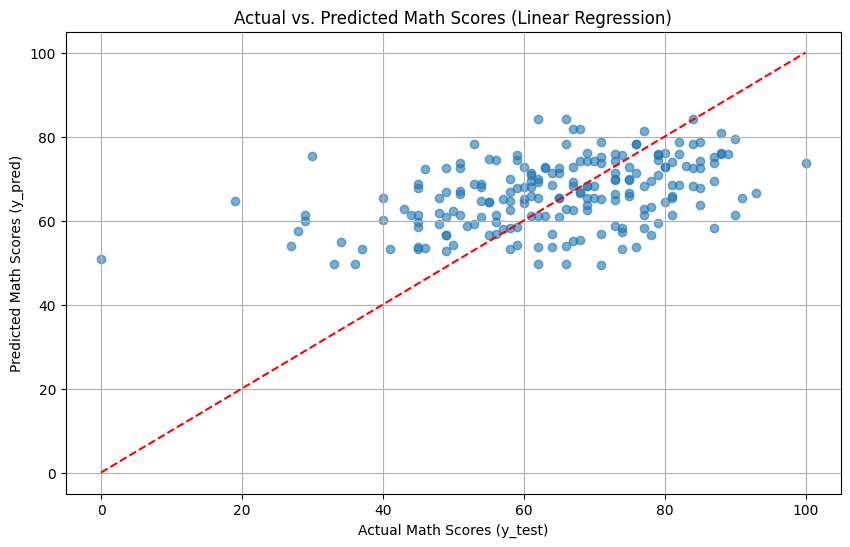

In [13]:
import matplotlib.pyplot as plt

# Predict exam scores for test data
y_pred = linear_model.predict(X_test)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Regression line (ideal fit)
plt.xlabel("Actual Math Scores (y_test)")
plt.ylabel("Predicted Math Scores (y_pred)")
plt.title("Actual vs. Predicted Math Scores (Linear Regression)")
plt.grid(True)
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 11.27
R-squared (R²): 0.18


A MAE of around 11.27 indicates that, on average, our predictions are off by about 11.27 points from the actual math scores. An R² score of 0.77 means that approximately 77% of the variance in math scores can be explained by our model, which is a reasonably good fit, but there is still room for improvement.